# Ex3 - ML

# Q1

HELEN YONAS - הלן יונס  -  207521998

In [1]:
""" 
    Importing dependencies 
""" 
import numpy as np   # For math and matrix operations
import random
import matplotlib.pyplot as plt  # For visualizing the data
import math
import statistics #q2

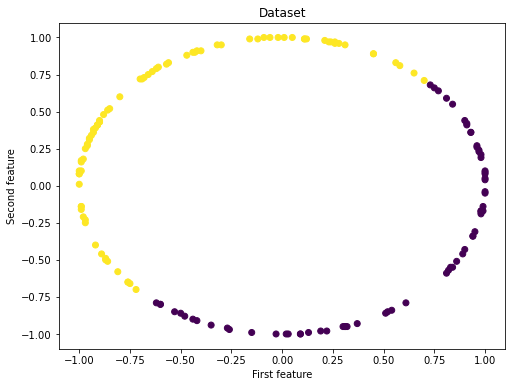

In [2]:
""" 
    #Plotting The data
""" 
ss=[]
sss=[]
data = np.genfromtxt('two_circle.txt', delimiter=' ')

for line in data:
    ss.append([line[2]])
    sss.append([line[0],line[1]])
    
X = np.array(sss)
Y = np.array(ss)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
"""
    Defining Sign/Step activation function
"""

def guess_step(x_): 
    if x_ > 0:       #If 𝑤_𝑡⋅𝑥_𝑖 > 0   ->  Guess +
        return 1
    else:
        return -1     #Else ->  Guess –


In [4]:
"""
    Defining Perceptron training algorithm - train to get the optimal weights

"""

def perceptron_training_alg(X, Y, learning_rate):
    #Step0: Initialize the parameters
    num_samples, num_features = X.shape
    rounds=0
    X = np.hstack( (np.ones((num_samples, 1)), X) ) #replace -1 with 1
    W=[[0.],[0.],[0.]] #Set vector w1=0
    W = np.array(W)
    W.reshape((-1,1))
   
    # Running the algorithm until all the data points are correctly classified
    samples_misclassified = True
    while samples_misclassified:
        rounds=rounds+1
        # Initially we'll assume that there are no misclassified samples
        samples_misclassified = False 
        #Iterate over all points xi
        for index, x in enumerate(X):
            #On mistake:
            if guess_step(x.reshape((1,-1))@W) != Y[index]: 
                print(f"eror number {rounds}")
                samples_misclassified = True #misclassified
                #If x is really + --->  𝑤_(𝑡+1)←𝑤_𝑡+𝑥_𝑖
                #If x is really - --->  𝑤_(𝑡+1)←𝑤_𝑡-𝑥_𝑖
                W = W + Y[index] * learning_rate * x.reshape((-1,1))  
                break
    return W,rounds
            
            

In [5]:
class Point:
    def __init__(self, x: float, y: float, pos_neg: int):
        self.x = x
        self.y = y
        self.pos_neg = pos_neg
        self.w = 0
    def toArray(self):
        return [self.x, self.y, self.pos_neg]

class Rule:
    def __init__(self, p1: Point, p2: Point, pos_neg: int):
        self.p1 = p1
        self.p2 = p2
        self.neg_pos = pos_neg
        self.a = (self.p1.y - self.p2.y)
        self.b = (self.p2.x - self.p1.x)
        self.c = (self.p1.x * self.p2.y - self.p2.x * self.p1.y)
    def eval(self, point: Point):
        if self.a * point.x + self.b * point.y + self.c >= 0:
            return self.neg_pos
        else:
            return -self.neg_pos

In [6]:

W ,rounds= perceptron_training_alg(X, Y, 1)
print(f"the final vector is {W[1]}{W[2]}")
print(f"There were a total of {rounds-1} mistakes and {rounds} rounds made by the algorithm")


eror number 1
eror number 2
eror number 3
eror number 4
eror number 5
eror number 6
the final vector is [-1.89][1.94]
There were a total of 6 mistakes and 7 rounds made by the algorithm


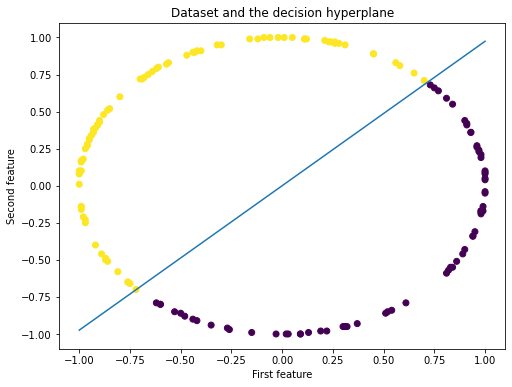

In [7]:
def plot_hyperplane(X, y, weights):
    """
    Ploting the decision hyperplane
    """
    slope = - weights[1]/weights[2]

    x_hyperplane = np.linspace(-1,1,2)
    y_hyperplane = slope * x_hyperplane 
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and the decision hyperplane")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

plot_hyperplane(X, Y, W )



# Q2


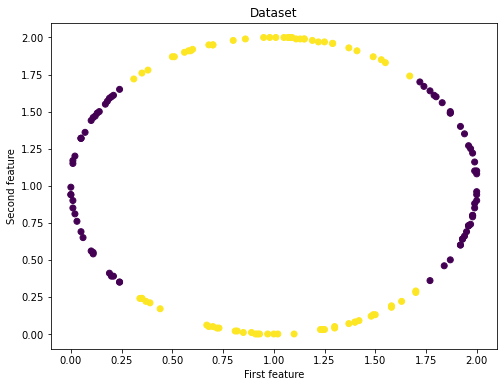

In [8]:
""" 
    #Plotting The data
""" 
ss=[]
sss=[]
data = np.genfromtxt('four_circle.txt', delimiter=' ')

for line in data:
    ss.append([line[2]])
    sss.append([line[0],line[1]])
    
X = np.array(sss)
Y = np.array(ss)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [9]:
iterations = 8
rounds = 100

def train_algo(points: list, rules: list, iterations: int):
    np.random.shuffle(points)  
    if len(points) % 2 == 0:
        train, test= points[:int(len(points) / 2)], points[int(len(points) / 2):]
    else:
        train, test= points[:int((len(points) + 1) / 2)], points[int((len(points) + 1) / 2):]
    for train_point in train:
        train_point.w = 1 / len(train)  
    rules_with_weights = []
    for i in range(iterations):
        min_error = np.inf  
        min_classifiers = []
        for l in rules:
            error = 0
            for train_point in train:
                if l.eval(point=train_point) != train_point.pos_neg:
                    error += train_point.w
            if len(min_classifiers) == 0 or error <= min_error:  
                if error != min_error:
                    min_error = error
                    min_classifiers.clear()
                min_classifiers.append(l)
        classifier_weight = math.log((1 - min_error) / min_error, math.e) / 2  
        normalization = 0
        min_classifier = random.choice(min_classifiers)

        for train_point in train:
            train_point.w = train_point.w / (math.e ** (classifier_weight * min_classifier.eval(point=train_point) * train_point.pos_neg))
            normalization += train_point.w
        for train_point in train:
            train_point.w = train_point.w / normalization
        rules_with_weights.append((min_classifier, classifier_weight))

    train_errors, test_errors = ([] for _ in range(2))
    iterations = len(rules_with_weights) if iterations > len(rules_with_weights) else iterations

    for i in range(iterations):
        train_errors.append(err___(rules_with_weights[:i + 1], train))
        test_errors.append(err___(rules_with_weights[:i + 1], test))

    return [train_errors, test_errors]


def pred(weighted_lines: list, point: Point):
    c = 0
    for h in weighted_lines:
        c += h[1] * h[0].eval(point)
    return 1 if c > 0 else -1
        
def err___(weighted_lines: list, l: list):
    total_error_sum = 0
    for p in l:
        if pred(weighted_lines, p) != p.pos_neg:
            err= 1 
        else:
            err=0
        total_error_sum += err
    return [total_error_sum / len(l)]


        
def algo__(points):

    rules = []
    for i in range(len(points)):
        p1 = points[i]
        for j in range(i + 1, len(points)):
            p2 = points[j]
            rules.append(Rule(p1, p2, 1))
            rules.append(Rule(p1, p2, -1))
    train_errors = [[0 for i in range(rounds)] for j in range(iterations)]
    test_errors = [[0 for i in range(rounds)] for j in range(iterations)]
    for i in range(rounds):
        [train_error, test_error] = train_algo(points, rules, iterations)
        for j in range(iterations):
            train_errors[j][i] = train_error[j][0]
            test_errors[j][i] = test_error[j][0]   
            
    for i in range(iterations):
        print("k = ", (i + 1),
              f"Empirical Error:{statistics.mean(train_errors[i])}",
              f"True Error:{statistics.mean(test_errors[i])}")
        

In [10]:
points = []
data = np.genfromtxt('four_circle.txt', delimiter=' ')
np.random.shuffle(data)
for line in data:
    points.append(Point(line[0], line[1], line[2]))
np.random.shuffle(points)  
algo__(points)

k =  1 Empirical Error:0.20653333333333335 True Error:0.304
k =  2 Empirical Error:0.23773333333333332 True Error:0.27786666666666665
k =  3 Empirical Error:0.0002666666666666667 True Error:0.0444
k =  4 Empirical Error:0.0014666666666666667 True Error:0.03746666666666667
k =  5 Empirical Error:0.0 True Error:0.0408
k =  6 Empirical Error:0.00013333333333333334 True Error:0.042
k =  7 Empirical Error:0.0 True Error:0.04133333333333333
k =  8 Empirical Error:0.0 True Error:0.038533333333333336


#### 1. Analyze the behavior of Adaboost on train and test. Do you see any exceptional behavior?  Explain.
##### ANSWER
###### We noticed a very special result in K = 3 The error of the training set and the test set decreased very significantly.
###### The weak laws chosen seem to be good because we have very low values in empirical error and also in true error.

###### It can be understood that the reason that in k=3 3 the error has been significantly reduced is the fact that the algorithm has enough room for action so that these three rules can act almost like the four circles.
###### In addition we see that although the points in the training and testing set are probably similar but not identical, both the training error and the testing error have been significantly reduced.
###### I can understand that three lines (rules) can pretty well classify the given dataset

###### In k = 1 and k = 2 we see relatively large errors and understand that the algorithm chose a lines that is weak learners (admittedly more accurate than 0.5 but not by much)


#### 2. Do you see overfitting? Explain.
##### Results:

###### k =  1 Empirical Error: 0.207 ,True Error: 0.308 ,pos: 0.302 ,neg: 0.287 
###### k =  2 Empirical Error: 0.236 ,True Error: 0.283 ,pos: 0.274 ,neg: 0.283 
###### k =  3 Empirical Error: 0.000 ,True Error: 0.049 ,pos: 0.040 ,neg: 0.056 
###### k =  4 Empirical Error: 0.001 ,True Error: 0.043 ,pos: 0.038 ,neg: 0.047 
###### k =  5 Empirical Error: 0.000 ,True Error: 0.045 ,pos: 0.037 ,neg: 0.052 
###### k =  6 Empirical Error: 0.000 ,True Error: 0.044 ,pos: 0.038 ,neg: 0.048 
###### k =  7 Empirical Error: 0.000 ,True Error: 0.044 ,pos: 0.036 ,neg: 0.050 
###### k =  8 Empirical Error: 0.000 ,True Error: 0.040 ,pos: 0.034 ,neg: 0.046 


##### ANSWER

###### At k = 1 there seems to be some over-matching to all the points. This can be understood with the data that the training set has an error of 0.206 compared to the real world where there is an error of 0.303. This can also be understood by the fact that with one line, there is not much that can be done about the data set given to us.
###### The points have four areas where they are concentrated two areas for positive and two areas for negative so the selected line probably selects most points correctly in a way that fits the given dataset but the algorithm can not reach all of them (certainly not in the real world) according to one law.

###### At k = 3 we get relatively good results with errors striving for zero in both sets. After K = 3 the results are relatively stable so there is no need to add more rules (which do not improve the results) and cause overfitting:
###### Low empirical error but high VC dimension
###### We see that in the training set the error has dropped to 0 but in the real world the error is 0.050 and does not decrease anymore so there is some overfitting.




